In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Chess_wids1.csv')

In [4]:
df

,Position (in January),Name,ELO,Date,Age
0,1,Carlsen,2862,2021 Jan,30
1,2,Caruana,2823,2021 Jan,28
2,3,Ding Liren,2791,2021 Jan,28
3,4,Nepomniachtchi,2789,2021 Jan,30
4,5,Vachier-Lagrave,2784,2021 Jan,30
...,...,...,...,...,...
435,16,Dreev,2680,2000 Jan,30
436,17,Georgiev,2677,2000 Jan,34
437,18,Almasi,2676,2000 Jan,23
438,19,Azmaiparashvili,2675,2000 Jan,39


In [14]:
rank_order =  df.sort_values('ELO' ,  ascending = False)

In [15]:
rank_order.head(10)

,Position (in January),Name,ELO,Date,Age
140,1,Carlsen,2872,2014 Jan,23
20,1,Carlsen,2872,2020 Jan,29
120,1,Carlsen,2862,2015 Jan,24
0,1,Carlsen,2862,2021 Jan,30
160,1,Carlsen,2861,2013 Jan,22
420,1,Kasparov,2851,2000 Jan,36
400,1,Kasparov,2849,2001 Jan,37
360,1,Kasparov,2847,2003 Jan,39
100,1,Carlsen,2844,2016 Jan,25
80,1,Carlsen,2840,2017 Jan,26


1 . player with the highest Elo rating in the dataset = Carlsen

2 . Top 10 Players With Highest Elo 

In [159]:
top_ten = df.sort_values('ELO', ascending=False).drop_duplicates('Name').head(10)[['Name', 'ELO']]
top_ten

,Name,ELO
140,Carlsen,2872
420,Kasparov,2851
41,Caruana,2828
42,Mamedyarov,2817
43,Ding Liren,2813
141,Aronian,2812
82,Kramnik,2811
122,Grischuk,2810
201,Anand,2810
83,So,2808


7 . Time Trend of Magnus Carlsen's Elo

In [160]:
df['Year'] = df['Date'].str[:4]
df['Year'] = df['Year'].astype(int)
df.head()

,Position (in January),Name,ELO,Date,Age,Year
0,1,Carlsen,2862,2021 Jan,30,2021
1,2,Caruana,2823,2021 Jan,28,2021
2,3,Ding Liren,2791,2021 Jan,28,2021
3,4,Nepomniachtchi,2789,2021 Jan,30,2021
4,5,Vachier-Lagrave,2784,2021 Jan,30,2021


In [166]:
df_magnus = df[df['Name'] == 'Carlsen']
df_magnus = df_magnus.sort_values(by='Year')
df_magnus

,Position (in January),Name,ELO,Date,Age,Year
272,13,Carlsen,2733,2008 Jan,17,2008
243,4,Carlsen,2776,2009 Jan,18,2009
220,1,Carlsen,2810,2010 Jan,19,2010
200,1,Carlsen,2814,2011 Jan,20,2011
180,1,Carlsen,2835,2012 Jan,21,2012
160,1,Carlsen,2861,2013 Jan,22,2013
140,1,Carlsen,2872,2014 Jan,23,2014
120,1,Carlsen,2862,2015 Jan,24,2015
100,1,Carlsen,2844,2016 Jan,25,2016
80,1,Carlsen,2840,2017 Jan,26,2017


([<matplotlib.axis.XTick at 0x1ffa2dd22c0>,
 [Text(2008, 0, '2008'),
  Text(2010, 0, '2010'),
  Text(2012, 0, '2012'),
  Text(2014, 0, '2014'),
  Text(2016, 0, '2016'),
  Text(2018, 0, '2018'),
  Text(2020, 0, '2020'),
  Text(2021, 0, '2021')])

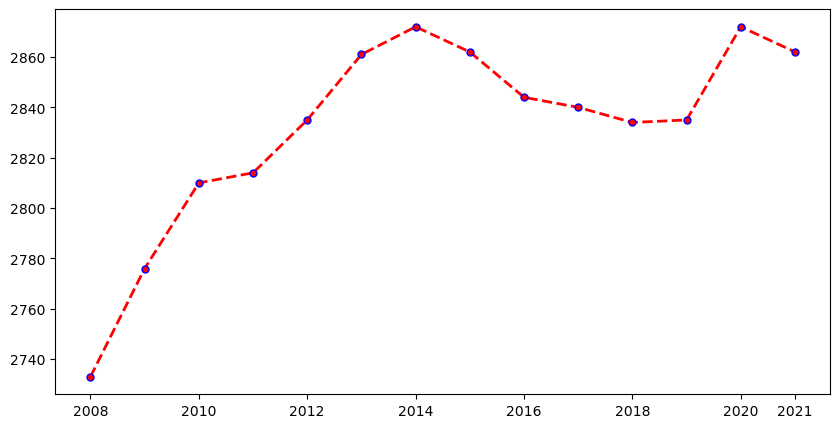

In [168]:
X = df_magnus['Year']
Y = df_magnus['ELO']

plt.figure(figsize=(10,5))

plt.plot(X, Y , color='red', linewidth=2,  marker='.', markersize=10, linestyle='--', markeredgecolor='blue')

plt.xticks(X[::2].to_list() + [2021])


3 . Time Trend of Top 10's Average Elo Each Year

In [170]:
def topTen_avg_elo(group):
    return group.nlargest(10, 'ELO')['ELO'].mean()

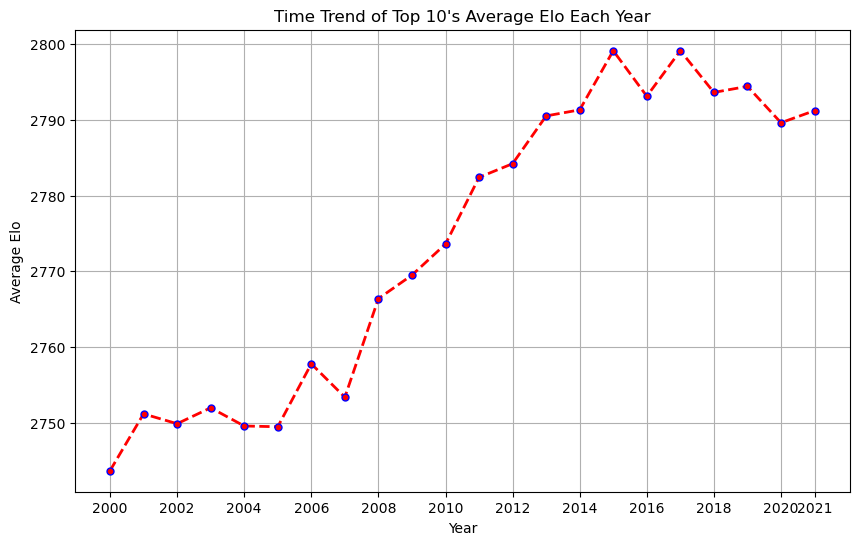

In [175]:
top_10_avg_elo_trend = df.groupby('Year').apply(topTen_avg_elo).reset_index(name='AvgTop10Elo')
plt.figure(figsize=(10, 6))
plt.plot(top_10_avg_elo_trend['Year'], top_10_avg_elo_trend['AvgTop10Elo'],color='red', linewidth=2,  marker='.', markersize=10, linestyle='--', markeredgecolor='blue')
plt.title("Time Trend of Top 10's Average Elo Each Year")
plt.xlabel("Year")
plt.ylabel("Average Elo")
plt.xticks(top_10_avg_elo_trend['Year'][::2].to_list() + [2021])
plt.grid()
plt.show()

4 . Time Trend for Number of Players Above 2750 Elo 

In [61]:
df.groupby(['Year']).count()

,Position (in January),Name,ELO,Date,Age
Year,,,,,
2000,20,20,20,20,20
2001,20,20,20,20,20
2002,20,20,20,20,20
2003,20,20,20,20,20
2004,20,20,20,20,20
2005,20,20,20,20,20
2006,20,20,20,20,20
2007,20,20,20,20,20
2008,20,20,20,20,20


4 . Time Trend for Number of Players Above 2750 Elo

In [178]:
new_df = df[df['ELO'] > 2750]

In [182]:
new_df

,Position (in January),Name,ELO,Date,Age,Year
0,1,Carlsen,2862,2021 Jan,30,2021
1,2,Caruana,2823,2021 Jan,28,2021
2,3,Ding Liren,2791,2021 Jan,28,2021
3,4,Nepomniachtchi,2789,2021 Jan,30,2021
4,5,Vachier-Lagrave,2784,2021 Jan,30,2021
...,...,...,...,...,...,...
402,3,Kramnik,2772,2001 Jan,25,2001
420,1,Kasparov,2851,2000 Jan,36,2000
421,2,Anand,2769,2000 Jan,30,2000
422,3,Kramnik,2758,2000 Jan,24,2000


In [183]:
df_trend = new_df.sort_values('Year')
df_trend = df_trend.groupby('Year')

df_trend = df_trend['Name'].nunique().reset_index()

In [184]:
df_trend

,Year,Name
0,2000,4
1,2001,3
2,2002,3
3,2003,3
4,2004,3
5,2005,4
6,2006,5
7,2007,4
8,2008,9
9,2009,10


In [185]:
df_trend.rename(columns={'Name': 'PlayerCount'}, inplace=True)

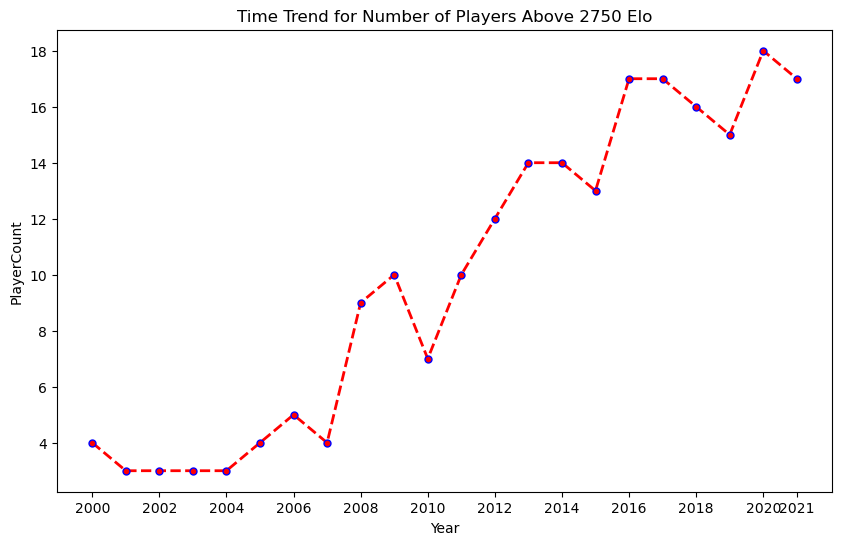

In [198]:
plt.figure(figsize=(10, 6))
plt.plot(df_trend['Year'] , df_trend['PlayerCount'] , color='red', linewidth=2,  marker='.', markersize=10, linestyle='--', markeredgecolor='blue')
plt.xlabel('Year')
plt.ylabel('PlayerCount')
plt.title('Time Trend for Number of Players Above 2750 Elo')
plt.xticks(df_trend.Year[::2].to_list() + [2021])
plt.show()

5 . Time Trend of Top 10's Average Age Each Year 

In [196]:
def topTen_avg_age(group):
    return group.nlargest(10, 'ELO')['Age'].mean()

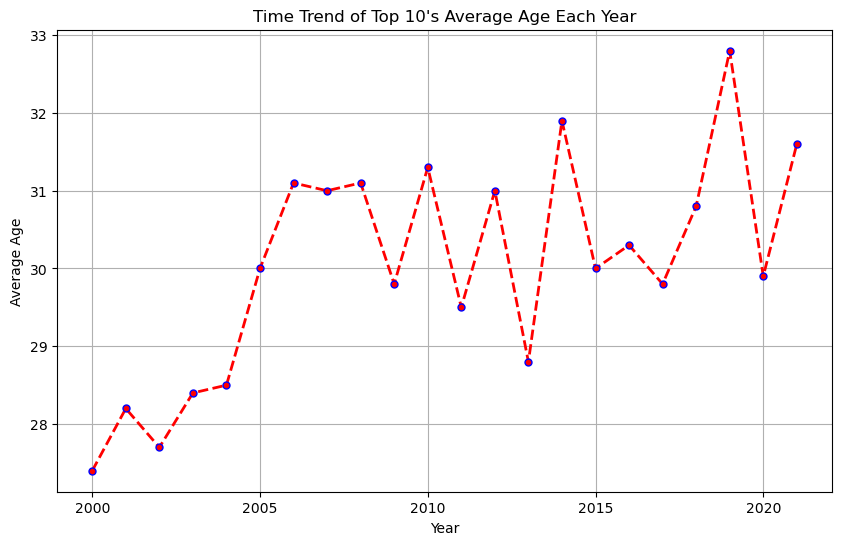

In [199]:
top_10_avg_age_trend = df.groupby('Year').apply(topTen_avg_age).reset_index(name='AvgTop10Age')
plt.figure(figsize=(10, 6))
plt.plot(top_10_avg_age_trend['Year'], top_10_avg_age_trend['AvgTop10Age'],  color='red', linewidth=2,  marker='.', markersize=10, linestyle='--', markeredgecolor='blue')
plt.title("Time Trend of Top 10's Average Age Each Year")
plt.xlabel("Year")
plt.ylabel("Average Age")
plt.grid()
plt.show()

6 . Time Trend for Number of Players Under 25 Years Old in Top 10

In [213]:
def topTen_below_25(group):
    return group.nlargest(10, 'ELO')[group['Age'] < 25].shape[0]

C:\Users\tudig\AppData\Local\Temp\ipykernel_46656\336281493.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  return group.nlargest(10, 'ELO')[group['Age'] < 25].shape[0]
C:\Users\tudig\AppData\Local\Temp\ipykernel_46656\336281493.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  return group.nlargest(10, 'ELO')[group['Age'] < 25].shape[0]
C:\Users\tudig\AppData\Local\Temp\ipykernel_46656\336281493.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  return group.nlargest(10, 'ELO')[group['Age'] < 25].shape[0]
C:\Users\tudig\AppData\Local\Temp\ipykernel_46656\336281493.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  return group.nlargest(10, 'ELO')[group['Age'] < 25].shape[0]
C:\Users\tudig\AppData\Local\Temp\ipykernel_46656\336281493.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  return group.nlargest(10, 'ELO')[gro

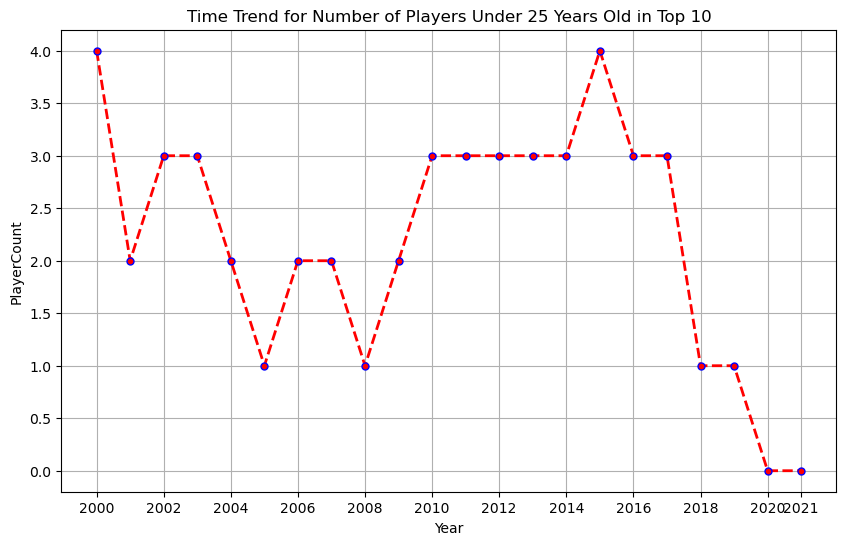

In [214]:
topTen_below_25_trend = df.groupby('Year').apply(topTen_below_25).reset_index(name='Top10UnderAge25')
plt.figure(figsize=(10, 6))
plt.plot(topTen_below_25_trend['Year'], topTen_below_25_trend['Top10UnderAge25'],color='red', linewidth=2,  marker='.', markersize=10, linestyle='--', markeredgecolor='blue')
plt.title("Time Trend for Number of Players Under 25 Years Old in Top 10")
plt.xlabel("Year")
plt.ylabel("PlayerCount")
plt.xticks(top_10_avg_elo_trend['Year'][::2].to_list() + [2021])
plt.grid()
plt.show()